In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

csv_path = "../data/el_farol.csv"

In [ ]:
# Set seed for reproducibility
random.seed(42)
np.random.seed(42)

# Settings
num_agents = 100
num_weeks = 50
noise_mean = 0
noise_std = 5  # standard deviation of exogenous noise

# Memory decay weights
memory_decay_weights_map = {
    2: [0.7, 0.3],
    3: [0.5, 0.3, 0.2],
    4: [0.4, 0.3, 0.2, 0.1]
}

# Initialize agents
agents = [{
    'Agent_ID': i,
    'Strategy': random.choice(['Optimist', 'Pessimist', 'Average']),
    'Memory_Length': random.choice([2, 3, 4]),
    'Risk_Tolerance': random.randint(50, 75)
} for i in range(num_agents)]

attendance_history = []
records = []

# Simulation with exogenous noise
for week in range(1, num_weeks + 1):
    decisions = {}
    
    # Agents decide based on memory-decay forecast
    for agent in agents:
        mem_len = agent['Memory_Length']
        strat = agent['Strategy']
        rt = agent['Risk_Tolerance']
        
        # Get last mem_len weeks
        memory = attendance_history[-mem_len:] if len(attendance_history) >= mem_len else []
        weights = memory_decay_weights_map[mem_len]
        
        # Default if not enough history
        if len(memory) < mem_len:
            if strat == 'Optimist':
                decision = 'Go'
            elif strat == 'Pessimist':
                decision = 'Stay'
            else:
                decision = 'Go' if random.random() < 0.5 else 'Stay'
            A_w = None
        else:
            # Weighted attendance forecast
            A_w = sum(w * a for w, a in zip(weights, memory))
            if strat == 'Optimist':
                decision = 'Go' if A_w <= rt else 'Stay'
            elif strat == 'Pessimist':
                trend_ok = memory[-1] <= sum(memory[:-1]) / len(memory[:-1])
                decision = 'Go' if (A_w <= rt and trend_ok) else 'Stay'
            else:
                decision = 'Go' if A_w <= rt else 'Stay'
        
        decisions[agent['Agent_ID']] = decision
        records.append({
            'Week': week,
            'Agent_ID': agent['Agent_ID'],
            'Strategy': strat,
            'Memory_Length': mem_len,
            'Risk_Tolerance': rt,
            'A_weighted': A_w,
            'Decision': decision,
            'Actual_Attendance': None
        })
    
    # Base attendance from agents
    base_attendance = sum(1 for d in decisions.values() if d == 'Go')
    # Add exogenous Gaussian noise and clamp
    noise = int(np.random.normal(noise_mean, noise_std))
    actual = max(0, min(num_agents, base_attendance + noise))
    
    attendance_history.append(actual)
    
    # Fill actual attendance in the last block of records
    for rec in records[-num_agents:]:
        rec['Actual_Attendance'] = actual

# Build DataFrame
df = pd.DataFrame(records)
print(df.head())


   Week  Agent_ID  Strategy  Memory_Length  Risk_Tolerance  A_weighted  \
0     1         0   Average              2              50         NaN   
1     1         1   Average              3              57         NaN   
2     1         2  Optimist              2              73         NaN   
3     1         3  Optimist              4              73         NaN   
4     1         4   Average              2              68         NaN   

  Decision  Actual_Attendance  
0       Go                 55  
1       Go                 55  
2       Go                 55  
3       Go                 55  
4       Go                 55  


In [ ]:
df.to_csv(csv_path, index=False)

In [3]:
# Reload the CSV to confirm content
df = pd.read_csv(csv_path)
df.head(10)

,Week,Agent_ID,Strategy,Memory_Length,Risk_Tolerance,A_weighted,Decision,Actual_Attendance
0,1,0,Average,2,50,NaN,Go,55
1,1,1,Average,3,57,NaN,Go,55
2,1,2,Optimist,2,73,NaN,Go,55
3,1,3,Optimist,4,73,NaN,Go,55
4,1,4,Average,2,68,NaN,Go,55
5,1,5,Pessimist,2,50,NaN,Stay,55
6,1,6,Optimist,2,57,NaN,Go,55
7,1,7,Average,4,50,NaN,Go,55
8,1,8,Average,2,72,NaN,Go,55
9,1,9,Average,4,67,NaN,Stay,55


In [4]:
# Filter the DataFrame for rows where Agent_ID == 1
agent_1_data = df[df["Agent_ID"] == 1]
agent_1_data.head(50)

,Week,Agent_ID,Strategy,Memory_Length,Risk_Tolerance,A_weighted,Decision,Actual_Attendance
1,1,1,Average,3,57,NaN,Go,55
101,2,1,Average,3,57,NaN,Go,53
201,3,1,Average,3,57,NaN,Stay,65
301,4,1,Average,3,57,56.4,Go,56
401,5,1,Average,3,57,57.2,Stay,60
501,6,1,Average,3,57,61.3,Stay,51
601,7,1,Average,3,57,56.2,Go,71
701,8,1,Average,3,57,59.5,Stay,55
801,9,1,Average,3,57,57.8,Stay,54
901,10,1,Average,3,57,62.8,Stay,66


# Data Exploration

In [4]:
df.head(10)

,Week,Agent_ID,Strategy,Memory_Length,Risk_Tolerance,A_weighted,Decision,Actual_Attendance
0,1,0,Average,2,50,NaN,Go,55
1,1,1,Average,3,57,NaN,Go,55
2,1,2,Optimist,2,73,NaN,Go,55
3,1,3,Optimist,4,73,NaN,Go,55
4,1,4,Average,2,68,NaN,Go,55
5,1,5,Pessimist,2,50,NaN,Stay,55
6,1,6,Optimist,2,57,NaN,Go,55
7,1,7,Average,4,50,NaN,Go,55
8,1,8,Average,2,72,NaN,Go,55
9,1,9,Average,4,67,NaN,Stay,55


In [5]:
df.tail(10)

,Week,Agent_ID,Strategy,Memory_Length,Risk_Tolerance,A_weighted,Decision,Actual_Attendance
4990,50,90,Average,4,65,57.0,Go,57
4991,50,91,Optimist,3,75,59.5,Go,57
4992,50,92,Pessimist,2,53,57.5,Stay,57
4993,50,93,Optimist,4,63,57.0,Go,57
4994,50,94,Pessimist,3,63,59.5,Go,57
4995,50,95,Pessimist,4,51,57.0,Stay,57
4996,50,96,Average,4,70,57.0,Go,57
4997,50,97,Optimist,2,62,57.5,Go,57
4998,50,98,Average,3,75,59.5,Go,57
4999,50,99,Optimist,2,56,57.5,Stay,57


In [13]:
df.shape

(5000, 8)

In [7]:
df.columns

Index(['Week', 'Agent_ID', 'Strategy', 'Memory_Length', 'Risk_Tolerance',
       'A_weighted', 'Decision', 'Actual_Attendance'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Week               5000 non-null   int64  
 1   Agent_ID           5000 non-null   int64  
 2   Strategy           5000 non-null   object 
 3   Memory_Length      5000 non-null   int64  
 4   Risk_Tolerance     5000 non-null   int64  
 5   A_weighted         4705 non-null   float64
 6   Decision           5000 non-null   object 
 7   Actual_Attendance  5000 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 312.6+ KB


In [10]:
df.describe()

,Week,Agent_ID,Memory_Length,Risk_Tolerance,A_weighted,Actual_Attendance
count,5000.000000,5000.000000,5000.000000,5000.000000,4705.000000,5000.000000
mean,25.500000,49.500000,2.950000,62.040000,57.790542,57.700000
std,14.432313,28.868957,0.864667,7.814769,3.918258,8.792352
min,1.000000,0.000000,2.000000,50.000000,45.100000,37.000000
25%,13.000000,24.750000,2.000000,56.000000,55.700000,51.000000
50%,25.500000,49.500000,3.000000,62.000000,57.500000,57.000000
75%,38.000000,74.250000,4.000000,69.000000,59.700000,63.000000
max,50.000000,99.000000,4.000000,75.000000,72.200000,80.000000


In [15]:
df.describe(include='object')

,Strategy,Decision
count,5000,5000
unique,3,2
top,Average,Go
freq,1950,2940


In [16]:
df['Strategy'].value_counts(normalize=True) * 100

Strategy
Average      39.0
Optimist     34.0
Pessimist    27.0
Name: proportion, dtype: float64

In [17]:
df['Decision'].value_counts(normalize=True) * 100

Decision
Go      58.8
Stay    41.2
Name: proportion, dtype: float64

# Visualizations

### Attendance over Time
- Shows the raw attendance around the median tolerance/comfort threshold. 
- What drives the attendance up and down?

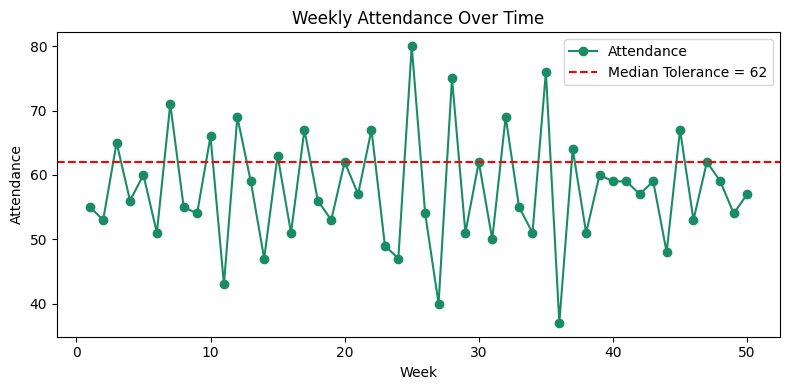

In [57]:

agent_rt = df.drop_duplicates('Agent_ID')['Risk_Tolerance']
median_rt = agent_rt.median()

weekly = df.groupby('Week')['Actual_Attendance'].first()

plt.figure(figsize=(8,4))

plt.plot(
    weekly.index,
    weekly.values,
    marker='o',
    linestyle='-',
    color=plt.cm.summer(0.1), 
    label='Attendance'
)

plt.axhline(
    median_rt,
    color='red',
    linestyle='--',
    label=f'Median Tolerance = {median_rt:.0f}'
)

plt.xlabel('Week')
plt.ylabel('Attendance')
plt.title('Weekly Attendance Over Time')
plt.legend()
plt.tight_layout()
plt.show()



### Distribution of Attendance Levels
- Look for the correlation between median risk tolerance (62) and mode of attendance (60)

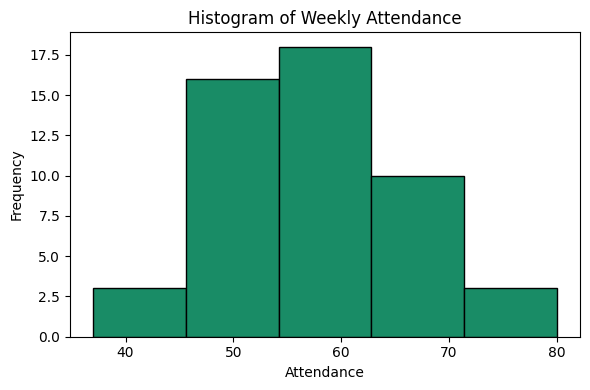

In [ ]:
plt.figure(figsize=(6,4))

plt.hist(
    weekly.values,
    bins=5,
    edgecolor='black',
    color=plt.cm.summer(0.1)  
)

plt.xlabel('Attendance')
plt.ylabel('Frequency')
plt.title('Histogram of Weekly Attendance')
plt.tight_layout()
plt.show()

### Attendance by Strategy
- How often do Optimists vs Pessimists vs Average thinkers go?

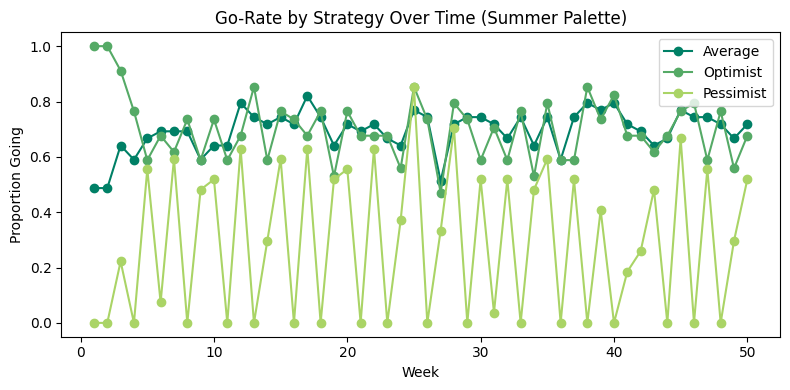

In [74]:
go_prop = (
    df.assign(Go=lambda d: d.Decision == 'Go')
      .groupby(['Week','Strategy'])['Go']
      .mean()
      .unstack()
)

colors = plt.cm.summer(np.linspace(0, 3, 10))

plt.figure(figsize=(8,4))
for color, strat in zip(colors, go_prop.columns):
    plt.plot(
        go_prop.index,
        go_prop[strat],
        marker='o',
        linestyle='-',
        label=strat,
        color=color
    )
plt.xlabel('Week')
plt.ylabel('Proportion Going')
plt.title('Go-Rate by Strategy Over Time (Summer Palette)')
plt.legend()
plt.tight_layout()
plt.show()

### Box‑plot of Go‐rates grouped by Memory Length
- Highlight how responsive different memory spans make an agent
- Short memory people may have more changes on whether to go/stay while longer memory people may have more similar choices

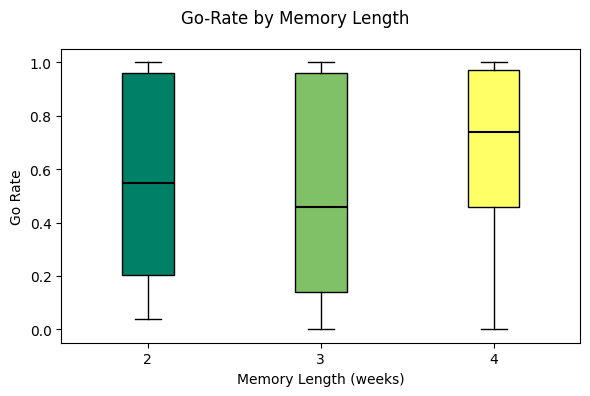

In [ ]:
agent_go = (
    df.groupby(['Agent_ID', 'Memory_Length'])['Decision']
      .apply(lambda x: (x == 'Go').mean())
      .reset_index(name='Go_Rate')
)

memory_lengths = sorted(agent_go['Memory_Length'].unique())
data_to_plot = [agent_go[agent_go['Memory_Length'] == k]['Go_Rate'] for k in memory_lengths]
colors = plt.cm.summer(np.linspace(0, 1, len(memory_lengths)))

plt.figure(figsize=(6,4))
bp = plt.boxplot(data_to_plot, patch_artist=True)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
for median in bp['medians']:
    median.set(color='black', linewidth=1.5)

plt.suptitle('Go-Rate by Memory Length')
plt.xlabel('Memory Length (weeks)')
plt.ylabel('Go Rate')
plt.xticks(range(1, len(memory_lengths) + 1), memory_lengths)
plt.tight_layout()
plt.show()

### Risk Tolerance vs Go‑Rate
- Does higher tolerance mean going more?

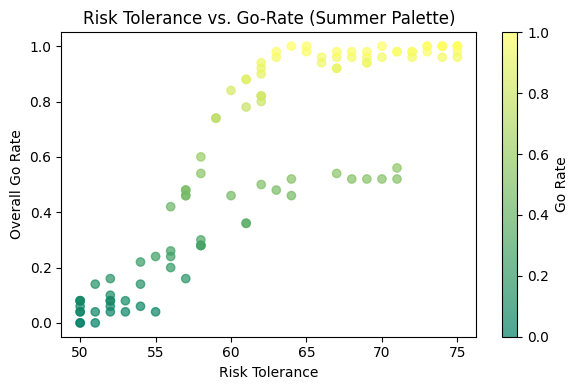

In [79]:
go_rate = df.groupby('Agent_ID')['Decision'].apply(lambda x: (x=='Go').mean())
rt = df.drop_duplicates('Agent_ID').set_index('Agent_ID')['Risk_Tolerance']

plt.figure(figsize=(6,4))
sc = plt.scatter(
    rt, 
    go_rate, 
    c=go_rate,          
    cmap='summer',      
    alpha=0.7
)
plt.colorbar(sc, label='Go Rate')
plt.xlabel('Risk Tolerance')
plt.ylabel('Overall Go Rate')
plt.title('Risk Tolerance vs. Go-Rate (Summer Palette)')
plt.tight_layout()
plt.show()

### Autocorrelation of Attendance (sinuggest lang ni gpt na gamitin to pero di q knows paano exactly gumagana HAHAHAHA)
- Measures the memory of the system
- If attendance was high (or low) last week, how likely is it to also be high (or low) this week?

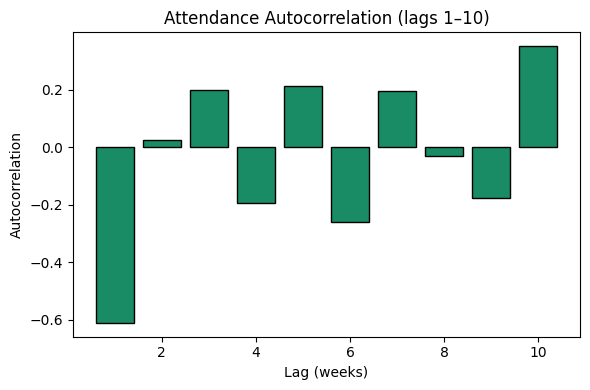

In [82]:
weekly = df.groupby('Week')['Actual_Attendance'].first()
acf = [weekly.autocorr(lag) for lag in range(1, 11)]

plt.figure(figsize=(6,4))
plt.bar(
    range(1, 11),
    acf,
    color=plt.cm.summer(0.1), 
    edgecolor='black'
)
plt.xlabel('Lag (weeks)')
plt.ylabel('Autocorrelation')
plt.title('Attendance Autocorrelation (lags 1–10)')
plt.tight_layout()
plt.show()
